In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

#### Set random seed 

In [2]:
import random

random.seed(2)
tf.random.set_seed(2)
np.random.seed(2)

In [3]:
pizza_sauce = pd.DataFrame({
    'tomato_sauce': ['no', 'no', 'yes', 'yes'],
    'barbecue_sauce': ['no', 'yes', 'no', 'yes'],
    'result': ['sauce error', 'good', 'good', 'sauce error']
})

pizza_sauce

,tomato_sauce,barbecue_sauce,result
0,no,no,sauce error
1,no,yes,good
2,yes,no,good
3,yes,yes,sauce error


In [4]:
pizza_sauce['c_tomato_sauce'] = pizza_sauce['tomato_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
pizza_sauce['c_barbecue_sauce'] = pizza_sauce['barbecue_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
pizza_sauce['c_result'] = pizza_sauce['result'].apply(lambda x: 1 if x == 'sauce error' else 0)

In [5]:
pizza_sauce

,tomato_sauce,barbecue_sauce,result,c_tomato_sauce,c_barbecue_sauce,c_result
0,no,no,sauce error,0,0,1
1,no,yes,good,0,1,0
2,yes,no,good,1,0,0
3,yes,yes,sauce error,1,1,1


<AxesSubplot:xlabel='c_tomato_sauce', ylabel='c_barbecue_sauce'>

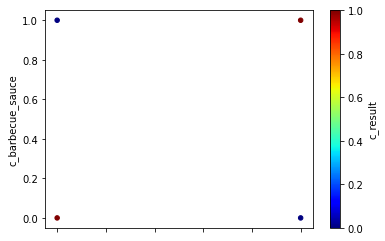

In [6]:
pizza_sauce.plot(
    kind='scatter',
    x='c_tomato_sauce',
    y='c_barbecue_sauce',
    c='c_result',
    colormap='jet'
)

#### Build neural network

In [8]:
# Declare network layers

input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

# Initialize model
pizza_sauce_model = Sequential()
pizza_sauce_model.add(input_layer)
pizza_sauce_model.add(output_layer)

# Add Optimization
sgd = SGD()

# Compile and summarize model
pizza_sauce_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
pizza_sauce_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fit the model to the dataset

history = pizza_sauce_model.fit(
    pizza_sauce[['c_tomato_sauce', 'c_barbecue_sauce']],
    pizza_sauce['c_result'],
    epochs=3000,
)

Epoch 1/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 11/3000
1/1

In [11]:
# Evaluate the model

test_loss, test_acc = pizza_sauce_model.evaluate(
    pizza_sauce[['c_tomato_sauce', 'c_barbecue_sauce']],
    pizza_sauce['c_result']
)

print(f'Evaluation result on Test Data: Loss = {test_loss}, Accuracy = {test_acc}')

1/1 [==============================] - 0s 234ms/step - loss: 0.6912 - accuracy: 0.5000
Evaluation result on Test Data: Loss = 0.6912098526954651, Accuracy = 0.5


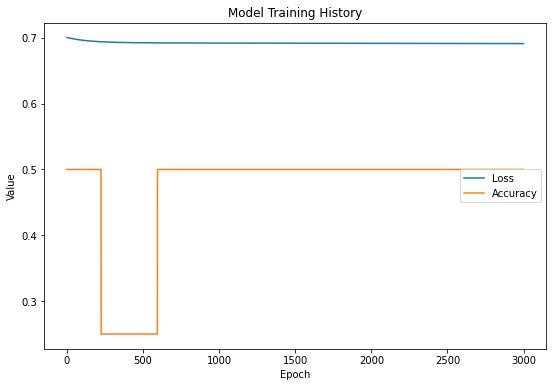

In [16]:
# The model finished training, but the results are not as good as expected. To debug it, 
# let's look at how training loss is changing:

plt.figure(figsize=(9, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

##### 📢: Interpretation
Loss moves slowly down, meaning that the model is learning; however, training is going very slowly - the learning rate could be too small. It could even be stuck. Let's try increasing the learning rate!

In [18]:
# Re-training the model

input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

pizza_sauce_model = Sequential()
pizza_sauce_model.add(input_layer)
pizza_sauce_model.add(output_layer)

high_lr_sgd = SGD(learning_rate=10)

pizza_sauce_model.compile(loss='binary_crossentropy', optimizer=high_lr_sgd, metrics=['accuracy'])
pizza_sauce_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
high_lr_model_history = pizza_sauce_model.fit(
    pizza_sauce[['c_tomato_sauce', 'c_barbecue_sauce']],
    pizza_sauce['c_result'],
    epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 1s 648ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.7500
Epoch 3/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.8389 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.6232 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.6192 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.1134 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.0670 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.0610 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 3ms/step - loss: 1.0571 - accuracy: 0.5000
Epoch 11/3000
1/1

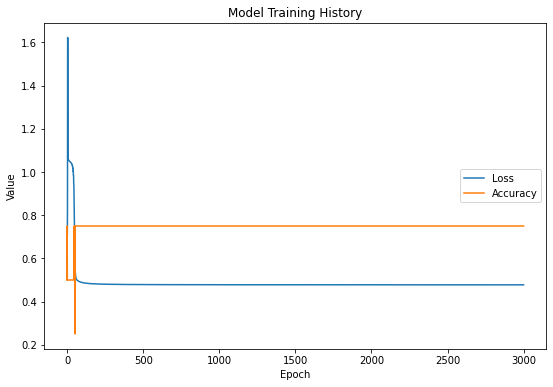

In [21]:
# Let's take a look at the training loss

plt.figure(figsize=(9, 6))
plt.plot(high_lr_model_history.history['loss'])
plt.plot(high_lr_model_history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

##### ✨: Observation
Instead of loss slowly reducing, it increased initially, signifying that the learning rate parameter is too large, which could make loss jump up or get stuck again.

In [25]:
# Let's try reducing the learning rate

input_layer = Dense(units=3, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

pizza_sauce_model = Sequential()
pizza_sauce_model.add(input_layer)
pizza_sauce_model.add(output_layer)

sgd = SGD(learning_rate=1)

pizza_sauce_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
pizza_sauce_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train again

history_model = pizza_sauce_model.fit(
    pizza_sauce[['c_tomato_sauce', 'c_barbecue_sauce']], 
    pizza_sauce['c_result'], 
    epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 0s 379ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.2500
Epoch 5/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.2500
Epoch 6/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.2500
Epoch 7/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 11/3000
1/1

In [27]:
# Evaluate the model

test_loss, test_acc = pizza_sauce_model.evaluate(
    pizza_sauce[['c_tomato_sauce', 'c_barbecue_sauce']], 
    pizza_sauce['c_result'],
)

print(f'Evaluation result on Test Data : Loss = {test_loss}, Accuracy = {test_acc}')

1/1 [==============================] - 0s 164ms/step - loss: 0.0035 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.0034905648790299892, Accuracy = 1.0


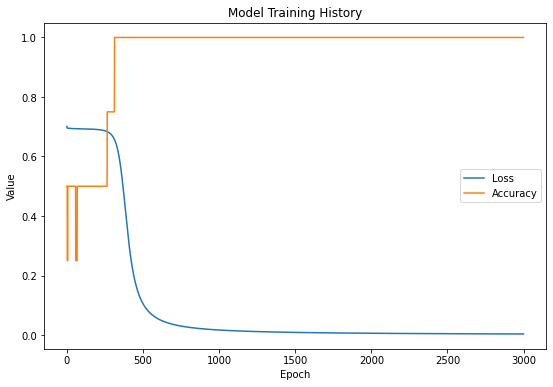

In [28]:
# let's see what it looks like on a loss plot

plt.figure(figsize=(9, 6))
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()